In [1]:
%matplotlib inline

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
START = pd.to_datetime(dt.datetime(2000, 1, 1))
END = pd.to_datetime(dt.datetime(2022, 3, 31))

def filter_data(df):
    result = df.copy()
    result["Date"] = pd.Series([pd.to_datetime(dt.datetime(r.Year, r.Month, r.Day)) for r in result.itertuples()])
    return result[(result["Date"] >= START) & (result["Date"] <= END)]

mel_df = pd.read_excel("../data/BOM_VIC_20220414.xlsx", sheet_name="Melbourne", usecols="B:G")
mel_df = filter_data(mel_df)

In [9]:
agg = mel_df[['Year','Month', 'Rainfall', 'Maximum']].groupby([mel_df['Year'], mel_df['Month']]).agg({'Year': 'first', 'Month': 'first', 'Rainfall': 'sum', 'Maximum': 'mean'})
agg2 = mel_df[["Year", "Month", "Maximum"]].groupby([mel_df['Year'], mel_df['Month']]).agg({'Year': 'first', 'Month': 'first', 'Maximum': 'max'})
df = pd.DataFrame({
    "Dates": pd.Series([pd.to_datetime(dt.datetime(a.Year, a.Month, 1)) for a in agg.itertuples()]),
    "Rainfall": agg["Rainfall"].values,
    "Temp_mean": agg["Maximum"].values,
    "Temp_max": agg2["Maximum"].values
})

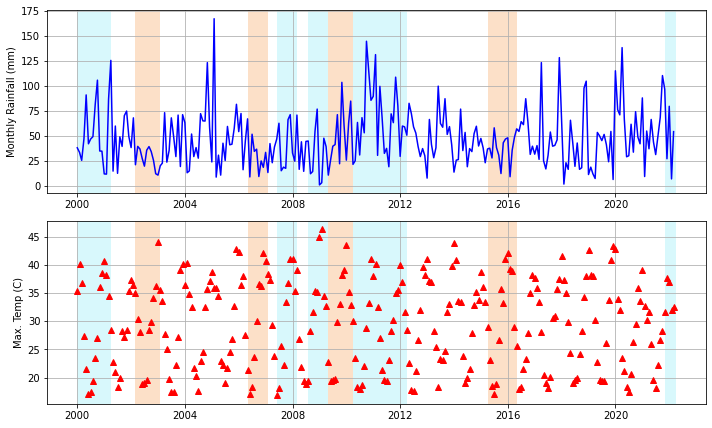

In [41]:
from climate import draw_la_nina_spans, draw_el_nino_spans

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

draw_la_nina_spans(ax[0])
draw_el_nino_spans(ax[0])

ax[0].grid(True)

ax[0].plot(df["Dates"], df["Rainfall"], color="blue")
ax[0].set_ylabel("Monthly Rainfall (mm)")

draw_la_nina_spans(ax[1])
draw_el_nino_spans(ax[1])

ax[1].grid(True)

ax[1].plot(df["Dates"], df["Temp_max"], "r^")
ax[1].set_ylabel("Max. Temp (C)")

fig.tight_layout()
plt.show()